**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

In [1]:
import glob
import os
import string

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from sklearn.metrics import confusion_matrix

### Load Data

The names can be found in text files in a src directory, one file per language.

In the following you can find some utilities to load the data into pandas data frames. 

We will restrict to some common European languages. 

With the given selection, we will identify all the occurring characters and initialize an alphabet.<br>
For this alphabet, we will use a one-hot-encoding to map them into a vector space representation. 

Foresee a suitable character for the end of the word, e.g. 'END'.

In [2]:
srcdir = 'data/names'
languages = ["English","French","Italian","German","Spanish"]

In [3]:
# inspect the data directory
def findFiles(path): 
    return glob.glob(path)

In [4]:
print('\n'.join(findFiles(os.path.join(srcdir,'*.txt'))))

data/names\Arabic.txt
data/names\Chinese.txt
data/names\Czech.txt
data/names\Dutch.txt
data/names\English.txt
data/names\French.txt
data/names\German.txt
data/names\Greek.txt
data/names\Irish.txt
data/names\Italian.txt
data/names\Japanese.txt
data/names\Korean.txt
data/names\Polish.txt
data/names\Portuguese.txt
data/names\Russian.txt
data/names\Scottish.txt
data/names\Spanish.txt
data/names\Vietnamese.txt


In [5]:
# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return lines

def load_data(srcdir, categories=None):
    names_list = []
    for filename in findFiles(os.path.join(srcdir,'*.txt')):
        category = os.path.splitext(os.path.basename(filename))[0]
        if not categories or category in categories: 
            names = readLines(filename)
            names_list.extend([(name,category) for name in names])
    df = pd.DataFrame(names_list)
    df.columns = ["name","lang"]
    return df

In [6]:
names = load_data(srcdir,categories=languages)
names.head(10)

,name,lang
0,Abbas,English
1,Abbey,English
2,Abbott,English
3,Abdi,English
4,Abel,English
5,Abraham,English
6,Abrahams,English
7,Abrams,English
8,Ackary,English
9,Ackroyd,English


In [7]:
maxlen = np.max([len(name) for name in names.name])
print("Maximum name length: ", maxlen)

Maximum name length:  18


In [8]:
alphabet = sorted(list(set(''.join([name for name in names.name]))))
alphabet.append('END')
len_alphabet = len(alphabet)
char_index = dict((c, i) for i, c in enumerate(alphabet))
print("Size of alphabet: ",len_alphabet)
print(alphabet)

Size of alphabet:  74
[' ', "'", 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Á', 'É', 'ß', 'à', 'á', 'ä', 'ç', 'è', 'é', 'ê', 'ì', 'í', 'ñ', 'ò', 'ó', 'ö', 'ù', 'ú', 'ü', 'END']


In [9]:
names.groupby('lang')['name'].count()/len(names)

lang
English    0.646230
French     0.048802
German     0.127555
Italian    0.124912
Spanish    0.052502
Name: name, dtype: float64

### Vector Representations

Now construct the vector representation by using one-hot-vectors. 

In [10]:
language_to_index = {country:index for index,country in enumerate(names.lang.unique())}
index_to_language = {index:country for index,country in enumerate(names.lang.unique())}

def onehot(i, length):
    v = np.zeros(length);
    v[i] = 1
    return v

def name_representation(name, maxlen):
    ### START YOUR CODE
    name_trunc = str(name)[0:maxlen]
    size = len(char_index)
    vector = [onehot(char_index[j], size) for j in str(name)]
    # fill the rest with 
    for k in range(0,maxlen - len(str(name))):
        vector.append(onehot(char_index['END'], size))
    return vector
    ### START YOUR CODE

def lang_representation(language, language_to_index):
    y = np.zeros(len(language_to_index))
    y[language_to_index[language]]=1
    return y

def lang_from_output(score):
    return index_to_language[np.argmax(score)]

def predict(name, model):
    score = model.predict(np.array([name_representation(name, maxlen)]))[0]
    return lang_from_output(score)

In [11]:
print(name_representation("B",maxlen))
print(lang_representation("French",language_to_index))

[array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.]), 

### Prepare train/test

Split the data into train/test

Shuffle the data

Transform the names data into a suitable vector respresentation:
* names into numpy arrays of shape (*,maxlen,len_alphabet)
* language into numpy array of shape (*,len(languages))



In [12]:
from sklearn.model_selection import train_test_split
test_split = 0.2

### START YOUR CODE
# Shuffle and split names data
x = names["name"]
y = names["lang"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=test_split, random_state=42)
### END YOUR CODE

In [13]:
### START YOUR CODE

# Map train and test data into vector space (one-hot-vectors)
X_train_collectiokn = []
for i in range(len(X_train)):
    xc = name_representation(name=X_train.iloc[i],maxlen=maxlen)
    X_train_collectiokn.append(xc)

Y_train_collection = []
for i in range(len(Y_train)):
    yc = lang_representation(language=Y_train.iloc[i],language_to_index=language_to_index)
    Y_train_collection.append(yc)

X_test_collectiokn = []
for i in range(len(X_test)):
    xct = name_representation(name=X_test.iloc[i],maxlen=maxlen)
    X_test_collectiokn.append(xct)

Y_test_collection = []
for i in range(len(Y_test)):
    yct = lang_representation(language=Y_test.iloc[i],language_to_index=language_to_index)
    Y_test_collection.append(yct)

### END YOUR CODE

In [14]:
X_train  = np.array(X_train_collectiokn)
Y_train = np.array(Y_train_collection)

X_test = np.array(X_test_collectiokn)
Y_test = np.array(Y_test_collection)

Possibly, pack the data into a Dataset (e.g. when working with in PyTorch)

### Define and Train Model: Single Layer with SimpleRNN

Create an RNN consisting of a single layer with a SimpleRNN (keras) and a softmax.

Then train the model. Play with different number of hidden units in the layer to obtain a good accuracy.

In [15]:
#Hyperparameter
batch_size= 64
nepochs = 30
nHidden =20
inputShape = (maxlen,len_alphabet)

In [16]:
### START YOUR CODE

# SimpleRNN, single layer with tf.keras....
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
model1 = Sequential()
model1.add(SimpleRNN(units=nHidden, input_shape=inputShape))
model1.add(Dense(len(languages), activation="softmax"))
model1.summary()

model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


### END YOUR CODE

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                1900      
                                                                 
 dense (Dense)               (None, 5)                 105       
                                                                 
Total params: 2,005
Trainable params: 2,005
Non-trainable params: 0
_________________________________________________________________


In [17]:
### START YOUR CODE

log = model1.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))

### END YOUR CODE

Epoch 1/30
71/71 [==============================] - 2s 13ms/step - loss: 1.4013 - accuracy: 0.4747 - val_loss: 1.1413 - val_accuracy: 0.6373
Epoch 2/30
71/71 [==============================] - 1s 11ms/step - loss: 1.1081 - accuracy: 0.6485 - val_loss: 1.1259 - val_accuracy: 0.6373
Epoch 3/30
71/71 [==============================] - 1s 12ms/step - loss: 1.1025 - accuracy: 0.6485 - val_loss: 1.1252 - val_accuracy: 0.6373
Epoch 4/30
71/71 [==============================] - 1s 12ms/step - loss: 1.0969 - accuracy: 0.6485 - val_loss: 1.1124 - val_accuracy: 0.6382
Epoch 5/30
71/71 [==============================] - 1s 12ms/step - loss: 1.0611 - accuracy: 0.6542 - val_loss: 1.0466 - val_accuracy: 0.6567
Epoch 6/30
71/71 [==============================] - 1s 11ms/step - loss: 0.9898 - accuracy: 0.6722 - val_loss: 0.9741 - val_accuracy: 0.6690
Epoch 7/30
71/71 [==============================] - 1s 11ms/step - loss: 0.9072 - accuracy: 0.6943 - val_loss: 0.9199 - val_accuracy: 0.6743
Epoch 8/30
71

Test loss: 0.7983320951461792
Test accuracy: 0.7235915660858154
Test accuracy: 0.7759912014007568


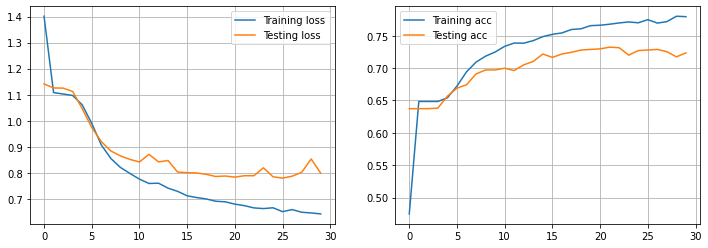

In [18]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model1.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> high number hidden Layer = overfitting!, low batchsize peaky/ high batchsize doesn't learn a lot... you have to do some hyperparameter tuning to finde the best values for example gridsearch...!</font>

### Implement Model with several SimpleRNN Layers

In [19]:
### START YOUR CODE

model = Sequential()
model.add(SimpleRNN(units=nHidden, input_shape=inputShape,return_sequences=True))
model.add(SimpleRNN(units=nHidden,return_sequences=True))
model.add(SimpleRNN(units=nHidden,return_sequences=False))
model.add(Dense(len(languages), activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
### END YOUR CODE

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 18, 20)            1900      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 18, 20)            820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 3,645
Trainable params: 3,645
Non-trainable params: 0
_________________________________________________________________


In [20]:
### START YOUR CODE

log = model.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))

### END YOUR CODE

Epoch 1/30
71/71 [==============================] - 3s 37ms/step - loss: 1.1702 - accuracy: 0.6121 - val_loss: 1.1153 - val_accuracy: 0.6373
Epoch 2/30
71/71 [==============================] - 2s 33ms/step - loss: 1.0662 - accuracy: 0.6520 - val_loss: 1.0432 - val_accuracy: 0.6444
Epoch 3/30
71/71 [==============================] - 2s 33ms/step - loss: 0.9505 - accuracy: 0.6804 - val_loss: 0.9357 - val_accuracy: 0.6761
Epoch 4/30
71/71 [==============================] - 2s 33ms/step - loss: 0.8173 - accuracy: 0.7209 - val_loss: 0.8273 - val_accuracy: 0.7104
Epoch 5/30
71/71 [==============================] - 2s 33ms/step - loss: 0.7519 - accuracy: 0.7425 - val_loss: 0.8002 - val_accuracy: 0.7174
Epoch 6/30
71/71 [==============================] - 2s 33ms/step - loss: 0.7211 - accuracy: 0.7553 - val_loss: 0.7903 - val_accuracy: 0.7227
Epoch 7/30
71/71 [==============================] - 3s 36ms/step - loss: 0.6969 - accuracy: 0.7595 - val_loss: 0.7359 - val_accuracy: 0.7368
Epoch 8/30
71

Test loss: 0.6707028150558472
Test accuracy: 0.7684859037399292
Test accuracy: 0.8574889898300171


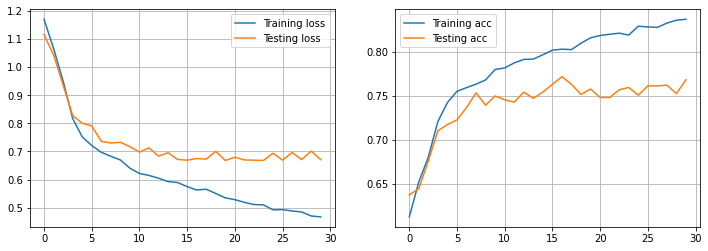

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> no big differences!</font>


### Class Imbalance Handling

Choose a method to address the class imbalance seen in the given example.
- minority resampling 
- class weights in the loss

Implement it and incorporate it in the training.
Evaluate the results and compare it with the results obtained with the unbalanced training.  

In [22]:
print(np.sum(names["lang"]=="English"))
print(np.sum(names["lang"]=="French"))
print(np.sum(names["lang"]=="Italian"))
print(np.sum(names["lang"]=="German"))
print(np.sum(names["lang"]=="Spanish"))

3668
277
709
724
298


In [23]:
from sklearn.utils import resample

x = names["name"]
y = names["lang"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=test_split, random_state=42)

df = pd.concat([X_train,Y_train],axis=1)

english = df[df["lang"]=="English"]
french = df[df["lang"]=="French"]
italian = df[df["lang"]=="Italian"]
german = df[df["lang"]=="German"]
spanish = df[df["lang"]=="Spanish"]

fUpsampled = resample(french,replace=True,n_samples=len(english),random_state=42)
iUpsampled = resample(italian,replace=True,n_samples=len(english),random_state=42)
gUpsampled = resample(german,replace=True,n_samples=len(english),random_state=42)
sUpsampled = resample(spanish,replace=True,n_samples=len(english),random_state=42)

dfUpsampled = pd.concat([english,fUpsampled,iUpsampled,gUpsampled,sUpsampled])

X_train = dfUpsampled["name"]
Y_train = dfUpsampled["lang"]

X_train_collectiokn = []
for i in range(len(X_train)):
    xc = name_representation(name=X_train.iloc[i],maxlen=maxlen)
    X_train_collectiokn.append(xc)

Y_train_collection = []
for i in range(len(Y_train)):
    yc = lang_representation(language=Y_train.iloc[i],language_to_index=language_to_index)
    Y_train_collection.append(yc)

X_test_collectiokn = []
for i in range(len(X_test)):
    xct = name_representation(name=X_test.iloc[i],maxlen=maxlen)
    X_test_collectiokn.append(xct)

Y_test_collection = []
for i in range(len(Y_test)):
    yct = lang_representation(language=Y_test.iloc[i],language_to_index=language_to_index)
    Y_test_collection.append(yct)

X_train  = np.array(X_train_collectiokn)
Y_train = np.array(Y_train_collection)

X_test = np.array(X_test_collectiokn)
Y_test = np.array(Y_test_collection)

In [24]:
print(np.sum(dfUpsampled["lang"]=="English"))
print(np.sum(dfUpsampled["lang"]=="French"))
print(np.sum(dfUpsampled["lang"]=="Italian"))
print(np.sum(dfUpsampled["lang"]=="German"))
print(np.sum(dfUpsampled["lang"]=="Spanish"))

2944
2944
2944
2944
2944


In [25]:
### START YOUR CODE

model = Sequential()
model.add(SimpleRNN(units=nHidden, input_shape=inputShape,return_sequences=True))
model.add(SimpleRNN(units=nHidden,return_sequences=True))
model.add(SimpleRNN(units=nHidden,return_sequences=False))
model.add(Dense(len(languages), activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
### END YOUR CODE

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 18, 20)            1900      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 18, 20)            820       
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 3,645
Trainable params: 3,645
Non-trainable params: 0
_________________________________________________________________


In [26]:
### START YOUR CODE

log = model.fit(x=X_train,y=Y_train,batch_size=256,epochs=nepochs, validation_data=(X_test,Y_test))

### END YOUR CODE

Epoch 1/30
58/58 [==============================] - 3s 40ms/step - loss: 1.5519 - accuracy: 0.3030 - val_loss: 1.4803 - val_accuracy: 0.3398
Epoch 2/30
58/58 [==============================] - 2s 35ms/step - loss: 1.3546 - accuracy: 0.4365 - val_loss: 1.4247 - val_accuracy: 0.2975
Epoch 3/30
58/58 [==============================] - 2s 35ms/step - loss: 1.2010 - accuracy: 0.5213 - val_loss: 1.3534 - val_accuracy: 0.3460
Epoch 4/30
58/58 [==============================] - 2s 34ms/step - loss: 1.0899 - accuracy: 0.5823 - val_loss: 1.2958 - val_accuracy: 0.3812
Epoch 5/30
58/58 [==============================] - 2s 36ms/step - loss: 1.0062 - accuracy: 0.6179 - val_loss: 1.2990 - val_accuracy: 0.3970
Epoch 6/30
58/58 [==============================] - 2s 36ms/step - loss: 0.9270 - accuracy: 0.6539 - val_loss: 1.2617 - val_accuracy: 0.4102
Epoch 7/30
58/58 [==============================] - 2s 35ms/step - loss: 0.8552 - accuracy: 0.6857 - val_loss: 1.2370 - val_accuracy: 0.4419
Epoch 8/30
58

Test loss: 1.305059552192688
Test accuracy: 0.5845070481300354
Test accuracy: 0.890081524848938


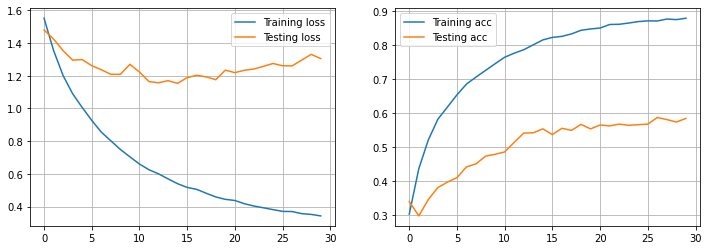

In [27]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> with upsampling and downsampling it's worse! have I done something wrong?</font>
